In [1]:
!pip install rdkit

In [2]:
!pip install networkx==2.6.3

In [3]:
!pip install matplotlib==3.5.1

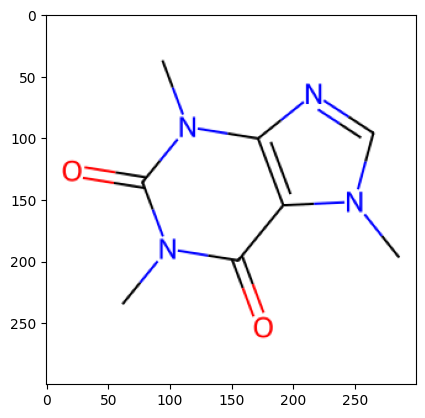

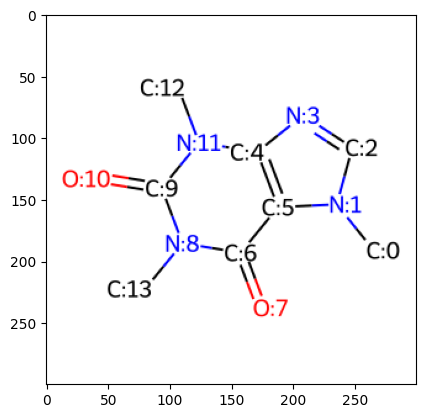

In [12]:
# import RDKit ----------------------------------------------------------------
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'

mol = Chem.MolFromSmiles(caffeine_smiles)

# draw the modecule -----------------------------------------------------------
Draw.MolToFile(mol, 'caffeine.png')

# draw the molecule with property ---------------------------------------------
for i, atom in enumerate(mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))

Draw.MolToFile(mol, 'caffeine_with_prop.png')
img = mpimg.imread('caffeine.png')
img2 = mpimg.imread('caffeine_with_prop.png')
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()


In [13]:
# print the atoms of the molecule ---------------------------------------------
for atom in mol.GetAtoms():
    print(atom.GetIdx(),',',
          atom.GetAtomicNum(),',',
          atom.GetIsAromatic(),',',
          atom.GetSymbol())

# print the bonds of the molecule ---------------------------------------------
for bond in mol.GetBonds():
    print(bond.GetBeginAtomIdx(),',',
          bond.GetEndAtomIdx(),',',
          bond.GetBondType())

0 , 6 , False , C
1 , 7 , True , N
2 , 6 , True , C
3 , 7 , True , N
4 , 6 , True , C
5 , 6 , True , C
6 , 6 , True , C
7 , 8 , False , O
8 , 7 , True , N
9 , 6 , True , C
10 , 8 , False , O
11 , 7 , True , N
12 , 6 , False , C
13 , 6 , False , C
0 , 1 , SINGLE
1 , 2 , AROMATIC
2 , 3 , AROMATIC
3 , 4 , AROMATIC
4 , 5 , AROMATIC
5 , 6 , AROMATIC
6 , 7 , DOUBLE
6 , 8 , AROMATIC
8 , 9 , AROMATIC
9 , 10 , DOUBLE
9 , 11 , AROMATIC
11 , 12 , SINGLE
8 , 13 , SINGLE
5 , 1 , AROMATIC
11 , 4 , AROMATIC


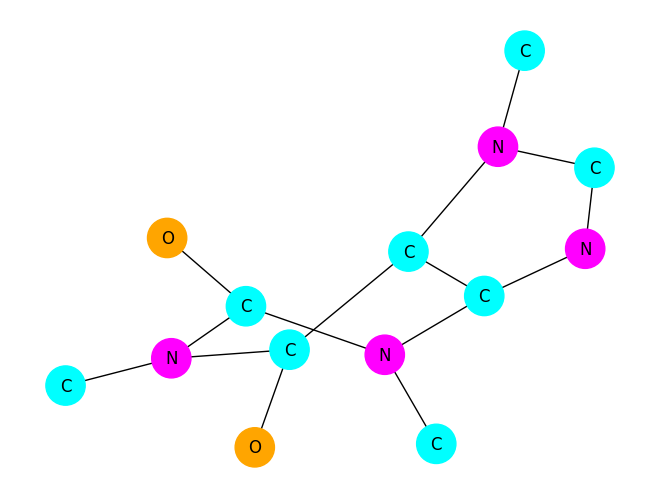

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [4]:
import networkx as nx

# define the smiles string and covert it into a molecule sturcture ------------
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
caffeine_mol = Chem.MolFromSmiles(caffeine_smiles)

# define the function for coverting rdkit object to networkx object -----------
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())

    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())

    return G

# conver rdkit object to networkx object --------------------------------------
caffeine_nx = mol_to_nx(caffeine_mol)

caffeine_atom = nx.get_node_attributes(caffeine_nx, 'atom_symbol')

color_map = {'C': 'cyan',
             'O': 'orange',
             'N': 'magenta'}

caffeine_colors = []
for idx in caffeine_nx.nodes():
    if (caffeine_nx.nodes[idx]['atom_symbol'] in color_map):
        caffeine_colors.append(color_map[caffeine_nx.nodes[idx]['atom_symbol']])
    else:
        caffeine_colors.append('gray')

nx.draw(caffeine_nx,
        labels=caffeine_atom,
        with_labels = True,
        node_color=caffeine_colors,
        node_size=800)

plt.show()

# print out the adjacency matrix ----------------------------------------------
matrix = nx.to_numpy_matrix(caffeine_nx)
print(matrix)